### Problem Set 3

Import data

In [38]:
%matplotlib inline
import pandas
import numpy as np

from math import factorial
from scipy.stats import ttest_ind as mr_t
import matplotlib.pyplot as plt
import scipy.stats as sp

titanic_train = pandas.read_csv('raw_data/train_titanic.csv', header=0)

### Did survivors pay more for their tickets than the dead?

Plot histogram of survivor fare vs dead fare distribution

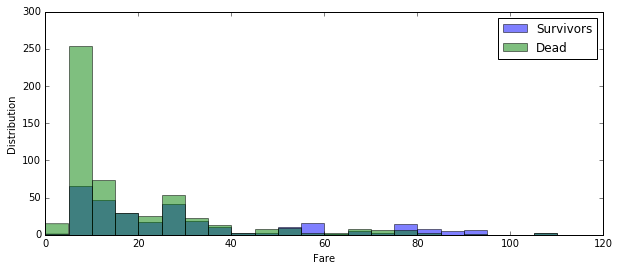

In [39]:
survivors = titanic_train[titanic_train.Survived == 1]
dead = titanic_train[titanic_train.Survived == 0]

plt.figure(figsize=(10, 4))
plt.hist(survivors.Fare, bins=np.arange(0,115,5), alpha=0.5, label='Survivors')
plt.hist(dead.Fare, bins=np.arange(0,115,5), alpha=0.5, label='Dead')
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Distribution')
plt.show()

### To what signifigance level?

In [40]:
from scipy.stats import mannwhitneyu
u, p = mannwhitneyu(survivors.Fare, dead.Fare)
print('U-statistic: {}'.format(u))
print('p-value: {}'.format(p*2))

U-statistic: 129951.5
p-value: 9.106954358500475e-22


The p-value tells us that we can be confident as to the certainty of our hypothesis that survivors fares and dead fares were different.  We are under the 0.01 p value significance cutoff.

### Find the constant that describes the relationship between age and fare.

Use linregress to find the slope.

In [46]:
from scipy.stats import linregress
titanic_train = titanic_train.dropna()
fare = titanic_train.Fare.tolist()
age = titanic_train.Age.tolist()

slope, intercept, r_value, p_value, std_err = linregress(age,fare)

print('The C value is: {}'.format(slope))

The C value is: -0.45106254749553626


Plot age vs fare with the linear regression to visualize.

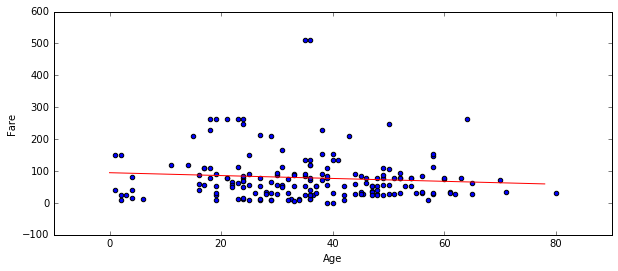

In [50]:
rng = np.arange(0,80,2)
vals = []
for i in rng:
    vals.append((i * slope) + intercept)

plt.figure(figsize=(10, 4))
plt.scatter(age,fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.plot(rng,vals,'r')
plt.show()